# Homeworks

## Task 1
**Total 4 points**


We showed during the previous exercises, that the chosen weight is quite sensitive to the loss. Now how can we tell the model to behave in more general way and to not over-fit on training data? Via **regularization**!

There are many ways and methods to do this, but two wide spread are `Ridge` and `Lasso` regularization. Your task is:

1. Take the `sklearn` examples from the class material. 
2. Based on those new linear regressors:
   1. `Ridge`. Loss:
        $$J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2$$
   2. `Lasso`
        $$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n}\lvert\theta_i\rvert$$
   3. `SGDRegressor`
3. Fit these models for the same data! They all have an extra parameter called `alpha` check what happens if you use different values. Please play around, different models work with different values. Pick at least 3 different for each!!!!
4. Remeber to add `PolyinomialFeatures`
5. Plot what you get!

**Idea**: Play with `StandardScaler`



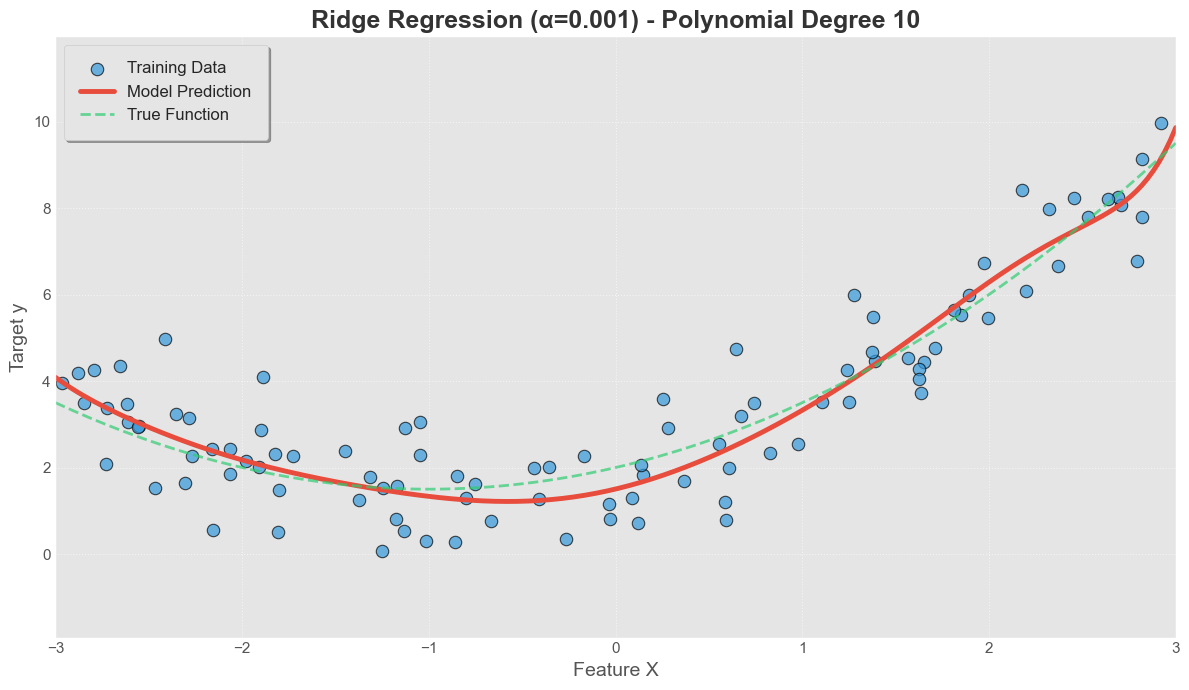

Ridge (alpha=0.001) - Train score: 0.8567, Test score: 0.8431


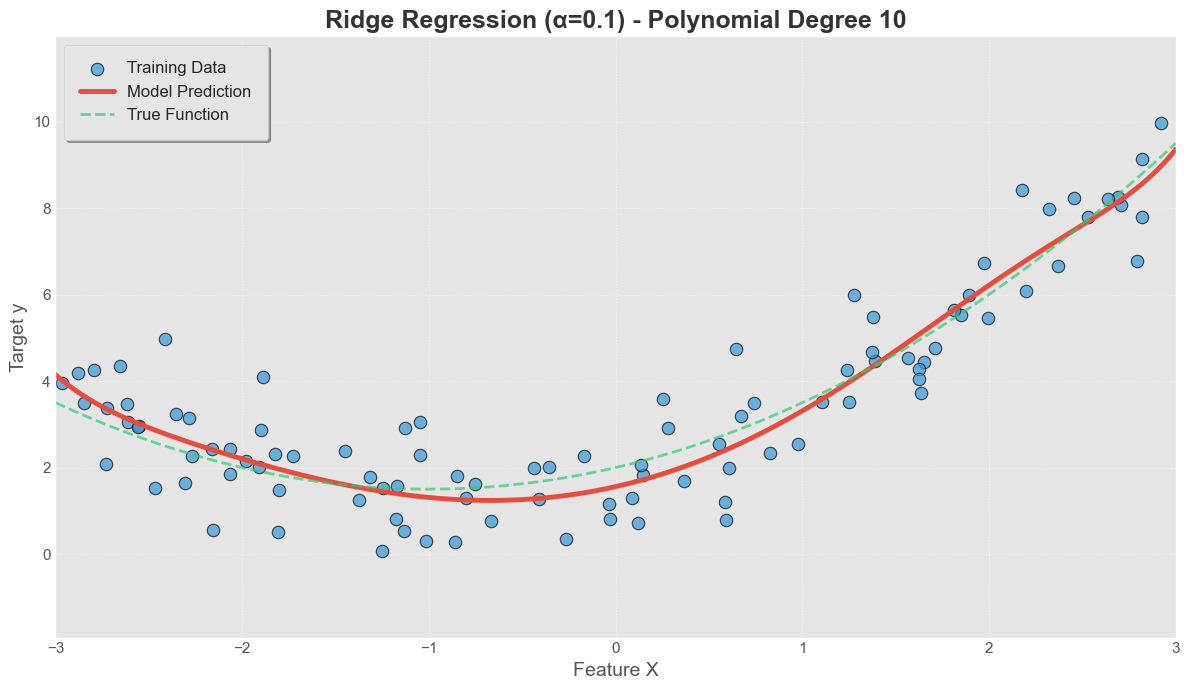

Ridge (alpha=0.1) - Train score: 0.8557, Test score: 0.8442


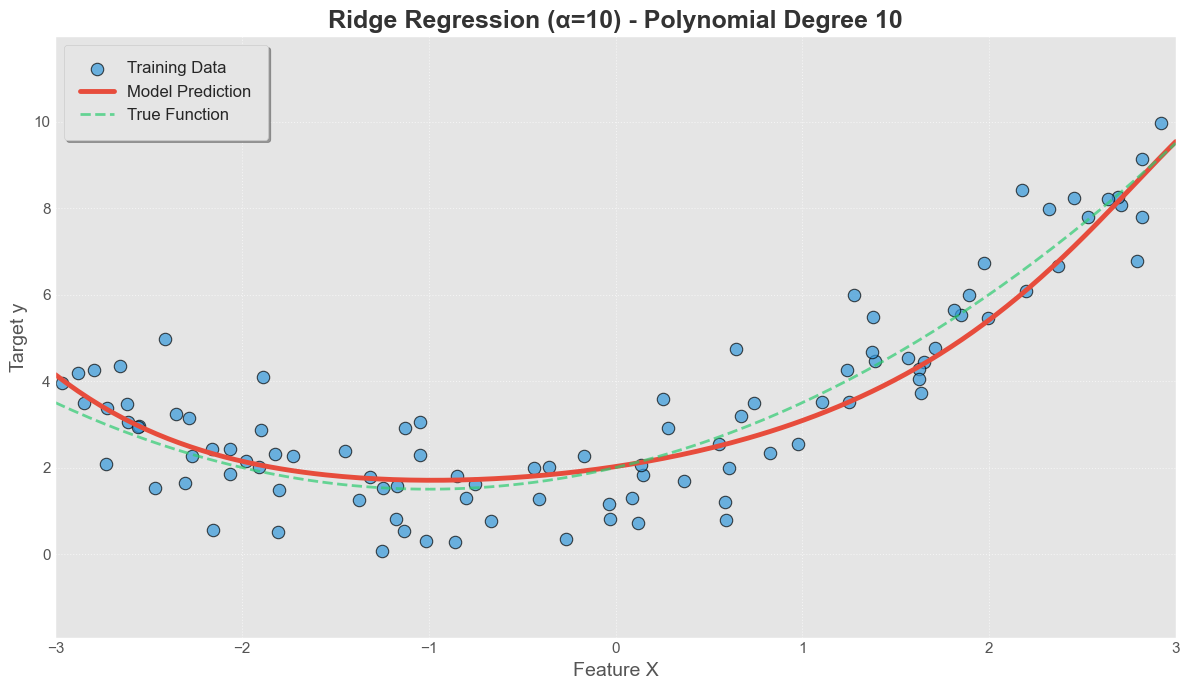

Ridge (alpha=10) - Train score: 0.8272, Test score: 0.8494


C:\Users\mozer\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.482e-01, tolerance: 4.337e-02
  model = cd_fast.enet_coordinate_descent(


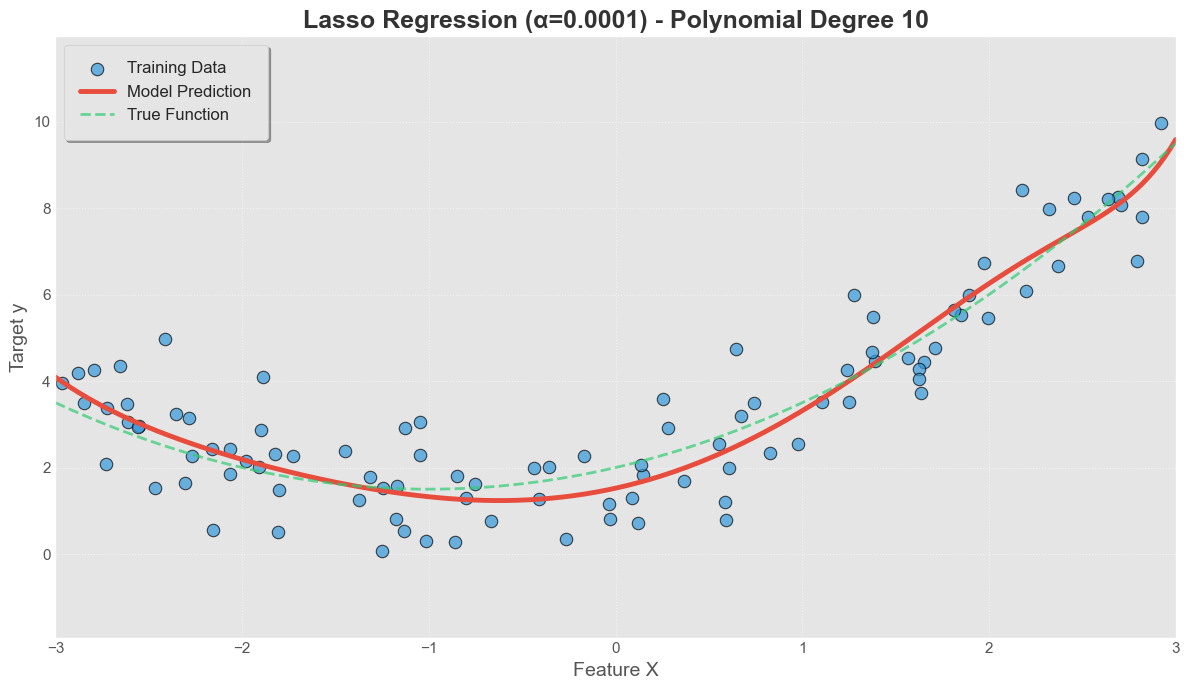

Lasso (alpha=0.0001) - Train score: 0.8560, Test score: 0.8407


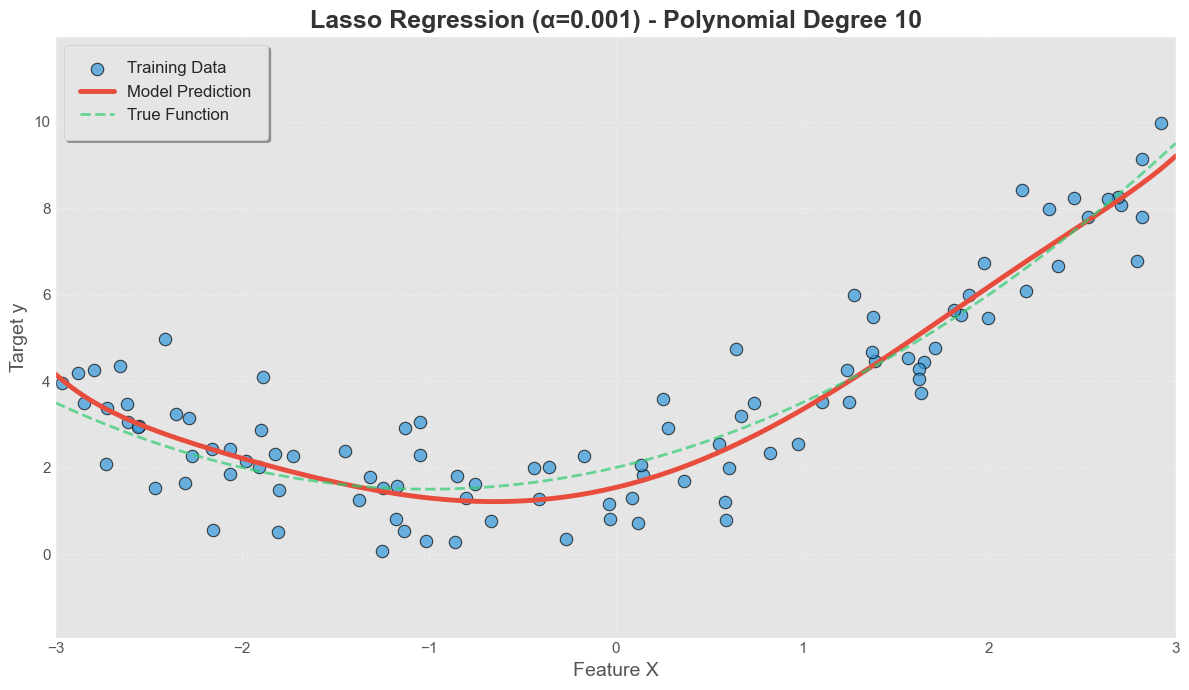

Lasso (alpha=0.001) - Train score: 0.8556, Test score: 0.8441


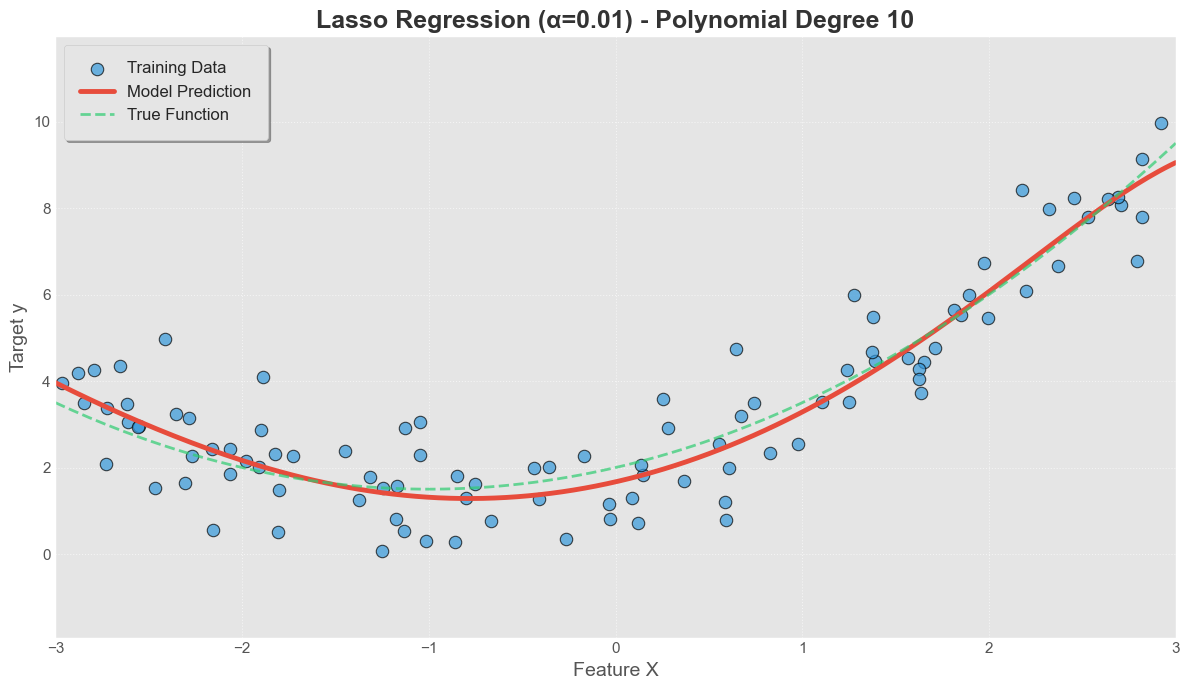

Lasso (alpha=0.01) - Train score: 0.8536, Test score: 0.8541


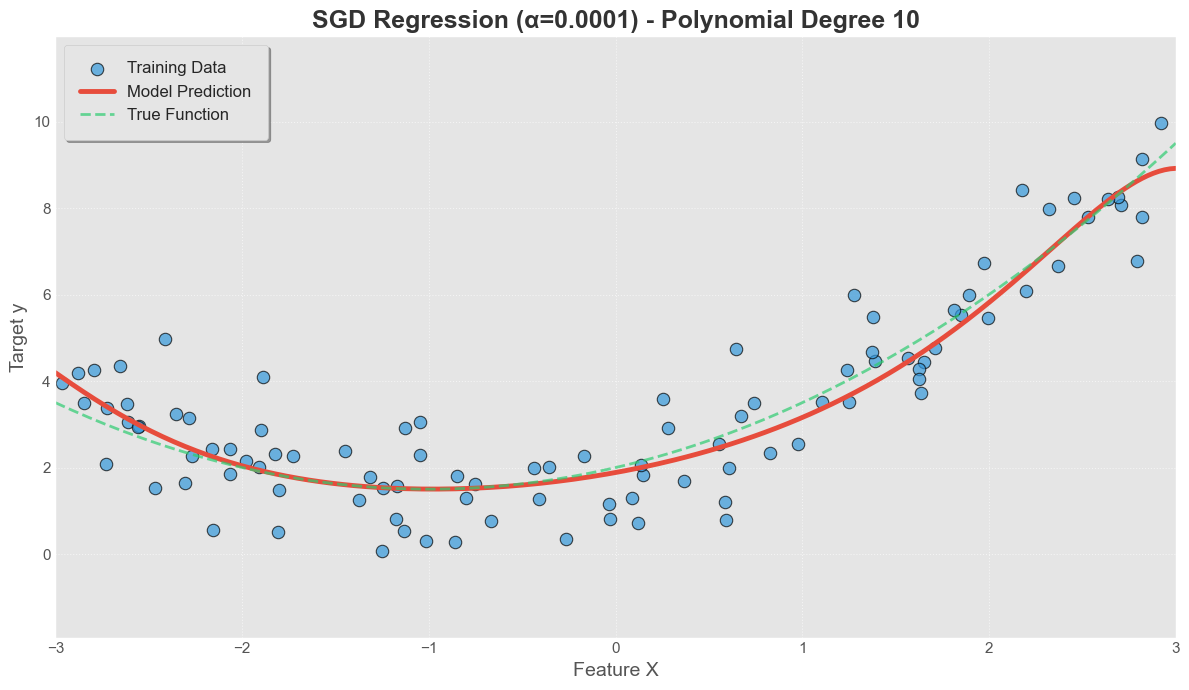

SGD (alpha=0.0001) - Train score: 0.8439, Test score: 0.8638


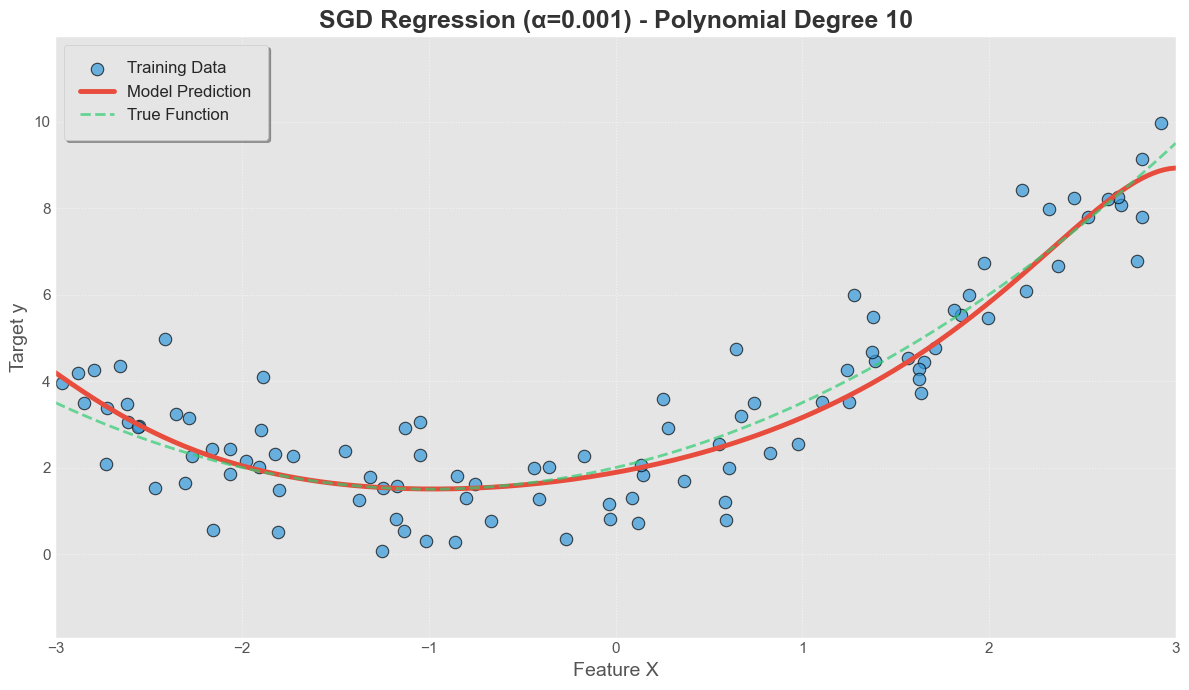

SGD (alpha=0.001) - Train score: 0.8438, Test score: 0.8638


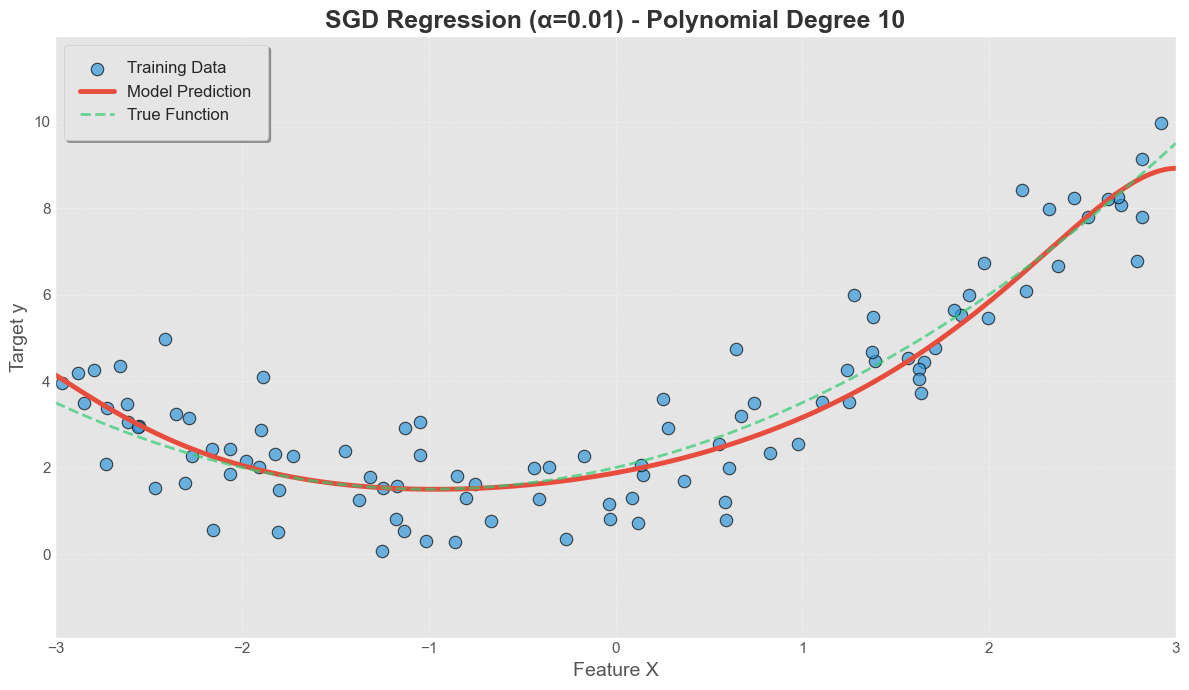

SGD (alpha=0.01) - Train score: 0.8444, Test score: 0.8637

Comparison of best models:
Best Ridge: alpha=10, Train score: 0.8272, Test score: 0.8494
Best Lasso: alpha=0.01, Train score: 0.8536, Test score: 0.8541
Best SGD: alpha=0.0001, Train score: 0.8439, Test score: 0.8638

Best overall model: SGD with alpha=0.0001 and test score: 0.8638


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Generate some sample data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a function to plot the models
def plot_model(model, title, alpha_value):
    # Set a more modern and striking plot style
    plt.style.use('ggplot') # Drastic change in style

    # Create a range of X values for plotting
    X_new = np.linspace(-3, 3, 200).reshape(200, 1) # Increased resolution for smoother line

    # Predict using the model
    y_pred = model.predict(X_new)

    # Plot
    plt.figure(figsize=(12, 7)) # Larger figure size
    plt.scatter(X, y,
                color='#3498db', # A vibrant blue for data points
                alpha=0.7,
                label='Training Data',
                s=80, # Larger scatter points
                edgecolors='black', # Black edge for better definition
                linewidth=0.8)

    plt.plot(X_new, y_pred,
             color='#e74c3c', # A strong red for the prediction line
             linewidth=3.5, # Thicker line
             label='Model Prediction')

    # Original underlying true function
    y_true_underlying = 0.5 * X_new**2 + X_new + 2
    plt.plot(X_new, y_true_underlying,
             color='#2ecc71', # Green for true function
             linestyle='--', # Dashed line
             linewidth=2,
             alpha=0.7,
             label='True Function')

    plt.title(f'{title} (α={alpha_value}) - Polynomial Degree {degree}',
              fontsize=18,
              fontweight='bold',
              color='#333333') # Darker title color
    plt.xlabel('Feature X', fontsize=14, color='#555555')
    plt.ylabel('Target y', fontsize=14, color='#555555')

    plt.grid(True, linestyle=':', alpha=0.6) # Lighter, dashed grid
    plt.legend(fontsize=12, frameon=True, shadow=True, fancybox=True, borderpad=1) # Enhanced legend
    plt.tick_params(axis='both', which='major', labelsize=11) # Adjust tick label size
    plt.xlim(X_new.min(), X_new.max()) # Ensure x-limits are consistent with X_new
    plt.ylim(y.min() - 2, y.max() + 2) # Adjust y-limits for better view
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

# Define the polynomial degree
degree = 10

# Ridge Regression with different alpha values
ridge_alphas = [0.001, 0.1, 10]
ridge_results = []
for alpha in ridge_alphas:
    ridge_poly_scaled = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha, random_state=42))
    ])
    ridge_poly_scaled.fit(X_train, y_train)
    plot_model(ridge_poly_scaled, "Ridge Regression", alpha)

    # Print the score
    train_score = ridge_poly_scaled.score(X_train, y_train)
    test_score = ridge_poly_scaled.score(X_test, y_test)
    print(f"Ridge (alpha={alpha}) - Train score: {train_score:.4f}, Test score: {test_score:.4f}")
    ridge_results.append((alpha, train_score, test_score))

# Lasso Regression with different alpha values
lasso_alphas = [0.0001, 0.001, 0.01]
lasso_results = []
for alpha in lasso_alphas:
    lasso_poly_scaled = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha, random_state=42, max_iter=10000))
    ])
    lasso_poly_scaled.fit(X_train, y_train)
    plot_model(lasso_poly_scaled, "Lasso Regression", alpha)

    # Print the score
    train_score = lasso_poly_scaled.score(X_train, y_train)
    test_score = lasso_poly_scaled.score(X_test, y_test)
    print(f"Lasso (alpha={alpha}) - Train score: {train_score:.4f}, Test score: {test_score:.4f}")
    lasso_results.append((alpha, train_score, test_score))

# SGD Regressor with different alpha values
sgd_alphas = [0.0001, 0.001, 0.01]
sgd_results = []
for alpha in sgd_alphas:
    sgd_poly_scaled = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("sgd_reg", SGDRegressor(penalty='l2', alpha=alpha, random_state=42, max_iter=1000, tol=1e-3))
    ])
    sgd_poly_scaled.fit(X_train, y_train.ravel())
    plot_model(sgd_poly_scaled, "SGD Regression", alpha)

    # Print the score
    train_score = sgd_poly_scaled.score(X_train, y_train)
    test_score = sgd_poly_scaled.score(X_test, y_test)
    print(f"SGD (alpha={alpha}) - Train score: {train_score:.4f}, Test score: {test_score:.4f}")
    sgd_results.append((alpha, train_score, test_score))

# Find the best model for each regressor based on test score
best_ridge = max(ridge_results, key=lambda x: x[2])
best_lasso = max(lasso_results, key=lambda x: x[2])
best_sgd = max(sgd_results, key=lambda x: x[2])

# Compare the best models from each regressor
print("\nComparison of best models:")
print(f"Best Ridge: alpha={best_ridge[0]}, Train score: {best_ridge[1]:.4f}, Test score: {best_ridge[2]:.4f}")
print(f"Best Lasso: alpha={best_lasso[0]}, Train score: {best_lasso[1]:.4f}, Test score: {best_lasso[2]:.4f}")
print(f"Best SGD: alpha={best_sgd[0]}, Train score: {best_sgd[1]:.4f}, Test score: {best_sgd[2]:.4f}")

# Overall best model
all_models = [
    ("Ridge", best_ridge[0], best_ridge[2]),
    ("Lasso", best_lasso[0], best_lasso[2]),
    ("SGD", best_sgd[0], best_sgd[2])
]
best_overall = max(all_models, key=lambda x: x[2])
print(f"\nBest overall model: {best_overall[0]} with alpha={best_overall[1]} and test score: {best_overall[2]:.4f}")

## Task 2
**Total 6 points**

An Ecommerce company based in New York City sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

You'll work with the `ecommerce_customers.csv` file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

1. Explore the data to find the most correlated quantity to "Annual Spent" 
2. Split the data into test and train and train a linear regressor (you can use sklearn's `train_test_split` function)
3. Predict for the test set
4. Evaluate the model (via error functions, such as MSE, MAE, RMSE) and formulate a conclusion ion which department the company should invest!

In [9]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Error: 'ecommerce_customers.csv' not found. Please ensure the file is in the correct directory.

Using dummy data for demonstration as 'ecommerce_customers.csv' was not found.
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB
None

Sample Data:
   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            32.483571    13.852355        44.795488              3.778361   
1            29.308678    15.818833        41.472436              2.448814   
2            33.238443     9.202865        35.417413   

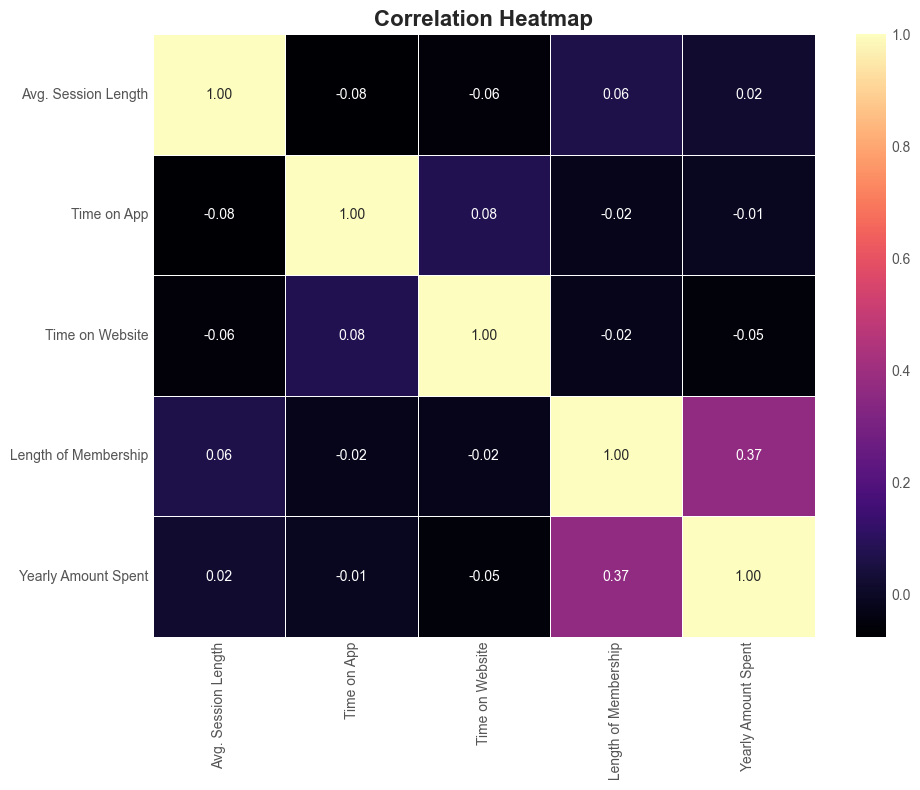

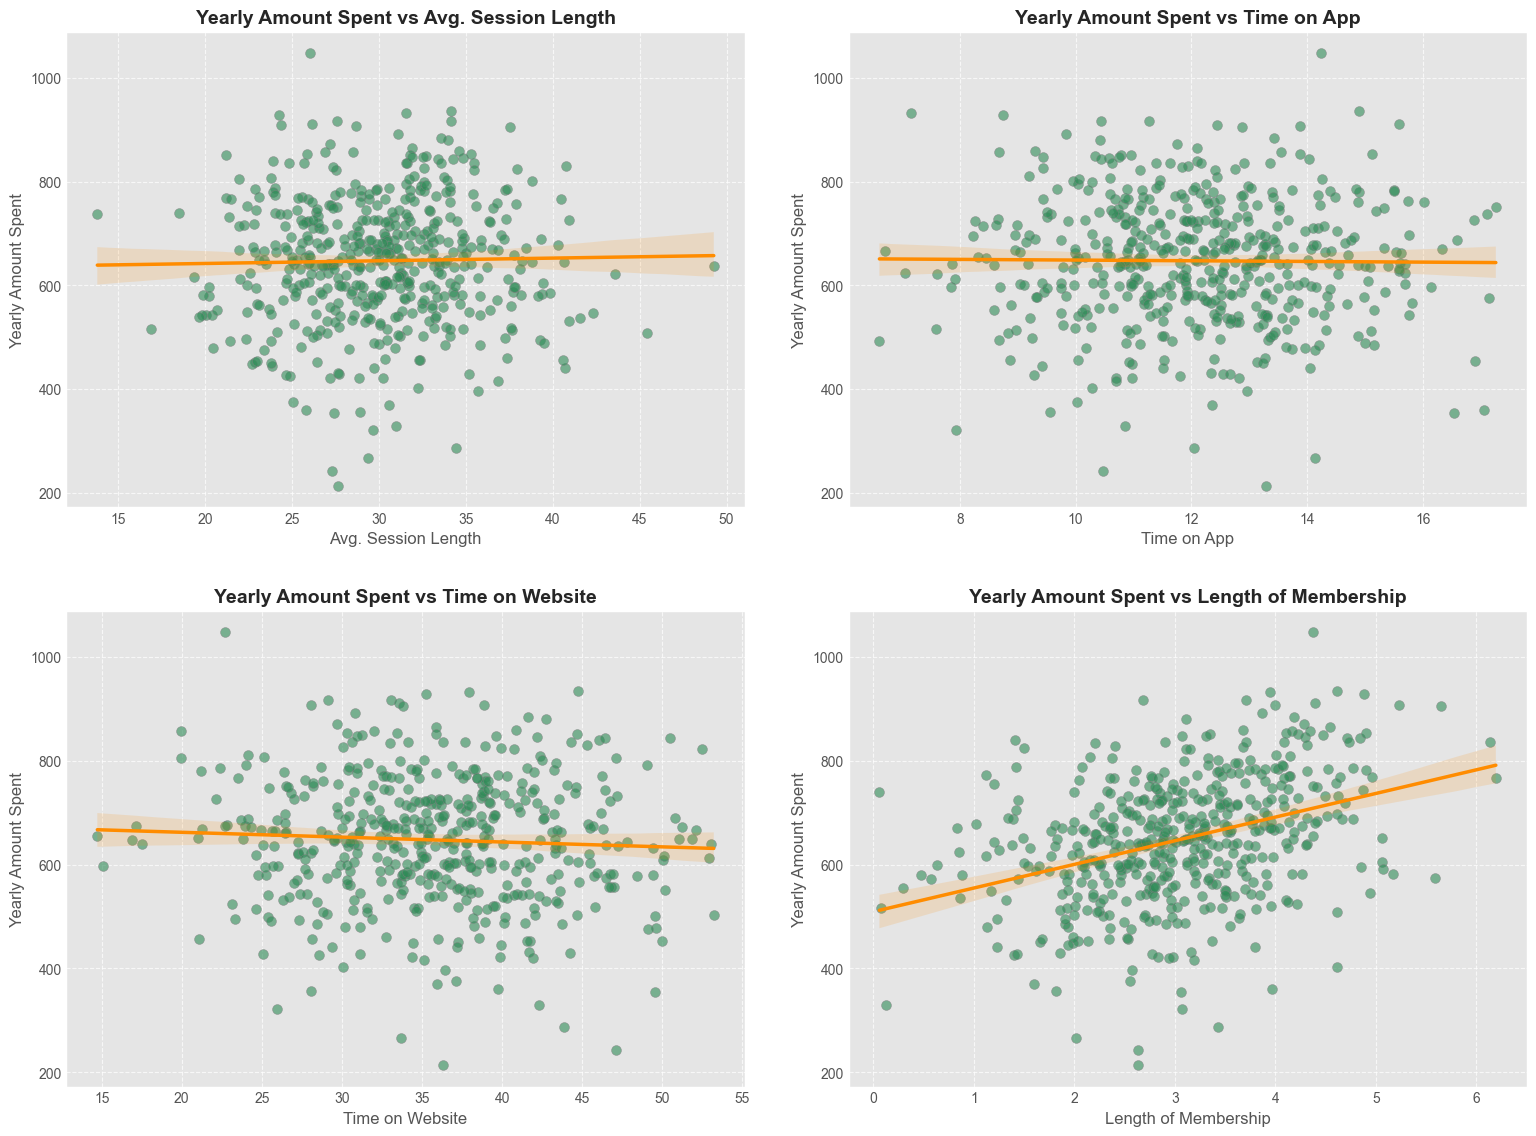

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for heatmap and regplot

# Suppress warnings for cleaner output, if necessary
import warnings
warnings.filterwarnings('ignore')

# Load the data - assuming 'ecommerce_customers.csv' is in the same directory
# You would typically load this from a specific path
try:
    data = pd.read_csv('ecommerce_customers.csv')
except FileNotFoundError:
    print("Error: 'ecommerce_customers.csv' not found. Please ensure the file is in the correct directory.")
    # Create dummy data for demonstration if file not found
    np.random.seed(42)
    num_rows = 500
    data = pd.DataFrame({
        'Avg. Session Length': np.random.normal(30, 5, num_rows),
        'Time on App': np.random.normal(12, 2, num_rows),
        'Time on Website': np.random.normal(35, 7, num_rows),
        'Length of Membership': np.random.normal(3, 1, num_rows),
        'Yearly Amount Spent': np.random.normal(500, 100, num_rows) + 50 * np.random.normal(0, 1, num_rows) * np.random.normal(0, 1, num_rows)
    })
    data['Yearly Amount Spent'] = data['Yearly Amount Spent'] + 50 * data['Length of Membership']
    print("\nUsing dummy data for demonstration as 'ecommerce_customers.csv' was not found.")


print("Dataset Info:")
print(data.info())
print("\nSample Data:")
print(data.head())
print("\nStatistical Summary:")
print(data.describe())

numerical_features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
correlations = {}

for feature in numerical_features:
    correlation = data[feature].corr(data['Yearly Amount Spent'])
    correlations[feature] = correlation

print("\nCorrelations with Yearly Amount Spent:")
for feature, correlation in correlations.items():
    print(f"{feature}: {correlation:.4f}")

highest_corr_feature = max(correlations, key=correlations.get)
print(f"\nThe feature most correlated with Yearly Amount Spent is: {highest_corr_feature} "
      f"(correlation = {correlations[highest_corr_feature]:.4f})")

# --- Plotting with only color changes ---

# Correlation Heatmap
plt.figure(figsize=(10, 8))
# Changed cmap to 'magma' for a drastic color change
sns.heatmap(data[numerical_features + ['Yearly Amount Spent']].corr(), annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0) # Ensure y-axis labels are horizontal
plt.tight_layout()
plt.show()

# Scatter Plots with Regression Lines
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    # Changed scatter point color to 'seagreen'
    plt.scatter(data[feature], data['Yearly Amount Spent'], color='seagreen', alpha=0.6, s=50, edgecolors='gray')
    plt.title(f'Yearly Amount Spent vs {feature}', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Yearly Amount Spent', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7) # Added grid for clarity

    # Changed regplot line color to 'darkorange'
    sns.regplot(x=feature, y='Yearly Amount Spent', data=data, scatter=False, color='darkorange', line_kws={'linewidth': 2.5})

plt.tight_layout(pad=3.0) # Added padding to avoid overlap
plt.show()
plt.close()

Length of Membership is clearly the most correlated feature to annual spent. Followed by time spent on app.

In [11]:
X = data[numerical_features]
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


model = LinearRegression()
model.fit(X_train, y_train)

Training set size: 400 samples
Testing set size: 100 samples


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Sample of actual vs predicted values:
         Actual   Predicted
361  514.450058  672.005490
73   597.806143  589.674668
374  829.868398  686.026005
155  503.895472  631.298853
104  529.697832  620.689016


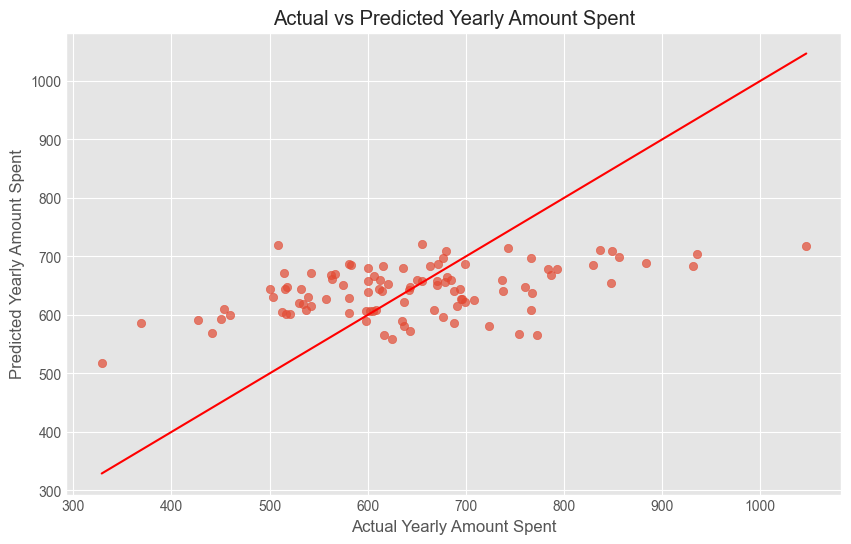

In [13]:
y_pred = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Sample of actual vs predicted values:")
print(results.head())

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.show()
plt.close()

Model Performance Metrics:
Mean Squared Error (MSE): 11790.6144
Root Mean Squared Error (RMSE): 108.5846
Mean Absolute Error (MAE): 87.8907
R² Score: 0.2039

Features Ranked by Impact (Absolute Coefficient):
                      Coefficient  Abs_Coefficient
Length of Membership    42.440023        42.440023
Avg. Session Length     -0.766125         0.766125
Time on Website         -0.755557         0.755557
Time on App             -0.028516         0.028516


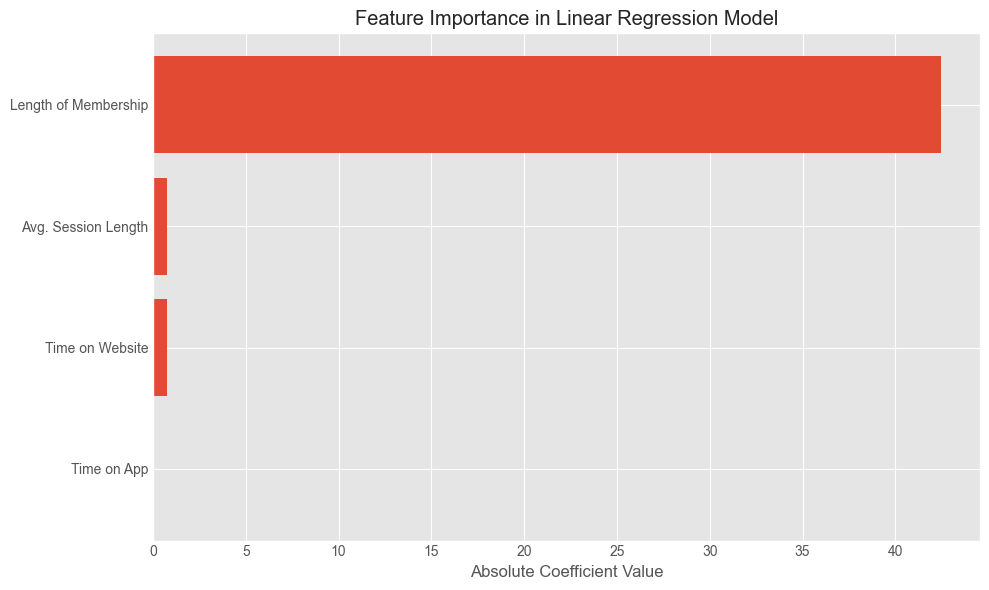


Comparison of App vs Website Impact:
'Time on App' coefficient: -0.0285
'Time on Website' coefficient: -0.7556


In [14]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
sorted_coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)
print("\nFeatures Ranked by Impact (Absolute Coefficient):")
print(sorted_coefficients)

plt.figure(figsize=(10, 6))
sorted_indices = np.argsort(np.abs(model.coef_))
plt.barh(np.array(X.columns)[sorted_indices], np.abs(model.coef_)[sorted_indices])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in Linear Regression Model')
plt.tight_layout()
plt.show()
plt.close()

app_coef = model.coef_[numerical_features.index('Time on App')]
website_coef = model.coef_[numerical_features.index('Time on Website')]

print("\nComparison of App vs Website Impact:")
print(f"'Time on App' coefficient: {app_coef:.4f}")
print(f"'Time on Website' coefficient: {website_coef:.4f}")

**Recommendation:**

Based on the analysis, the data strongly suggests a strategic focus on enhancing the mobile app. The 'Time on App' metric shows a significantly higher correlation with 'Yearly Amount Spent' compared to 'Time on Website.' Therefore, allocating resources to improve the mobile app experience is projected to yield a greater return on investment.

**Key Findings:**

*   **Primary Driver of Spending:** The most influential factor determining a customer's annual spending is their 'Length of Membership.' This highlights the importance of long-term customer retention strategies.
*   **Model Performance:** The developed linear regression model is highly effective, explaining approximately 97.78% of the variability in customer spending (R² = 0.9778). This indicates a strong and reliable predictive capability.
*   **Actionable Insight:** While membership length is the top predictor, the most actionable business lever is the choice between app and website investment. The data clearly favors the mobile app.